In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file = pd.read_csv("keras/adult.csv")
#file.head()
file.info()
# file.shape()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
file.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
file.count()

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [9]:
file['workclass'] = file['workclass'].replace('?',np.nan)
file['occupation'] = file['occupation'].replace('?',np.nan)
file['native-country'] = file['native-country'].replace('?',np.nan)

In [2]:
#file.dropna(how = 'any', inplace = True )

In [11]:
file.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
print(file.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
5        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 45222, dtype: bool>


In [13]:
file.shape

(45222, 15)

In [14]:
#file['income'] = file['income'].map({'>50':1,'<=50':0})

In [15]:
file.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
file.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
file.drop(['fnlwgt','educational-num','marital-status','relationship','race'],axis = 1,inplace = True)

In [18]:
file.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [19]:
x = file.iloc[:,:-1]#the first : represnts row and the second : reprsents coloumn and the last : is the value that will not be considerd
y = file.iloc[:,-1]


In [20]:
print(x)

       age     workclass     education         occupation  gender  \
0       25       Private          11th  Machine-op-inspct    Male   
1       38       Private       HS-grad    Farming-fishing    Male   
2       28     Local-gov    Assoc-acdm    Protective-serv    Male   
3       44       Private  Some-college  Machine-op-inspct    Male   
5       34       Private          10th      Other-service    Male   
...    ...           ...           ...                ...     ...   
48837   27       Private    Assoc-acdm       Tech-support  Female   
48838   40       Private       HS-grad  Machine-op-inspct    Male   
48839   58       Private       HS-grad       Adm-clerical  Female   
48840   22       Private       HS-grad       Adm-clerical    Male   
48841   52  Self-emp-inc       HS-grad    Exec-managerial  Female   

       capital-gain  capital-loss  hours-per-week native-country  
0                 0             0              40  United-States  
1                 0             0    

In [21]:
print(y)

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45222, dtype: object


In [22]:
from sklearn.preprocessing import LabelEncoder as LE
y = LE().fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [23]:
numeric_features = x.select_dtypes('number')
categorical_features = x.select_dtypes('object')
categorical_features


,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [24]:
numeric_features

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [25]:
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features.shape


(45222, 80)

In [26]:
converted_categorical_features.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
all_features = [converted_categorical_features,numeric_features]
nex = pd.concat(all_features,axis = 1, join = 'inner')
nex


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,25,0,0,40
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,38,0,0,50
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,28,0,0,40
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,44,7688,0,40
5,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,34,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,27,0,0,38
48838,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,40,0,0,40
48839,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,58,0,0,40
48840,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,22,0,0,20


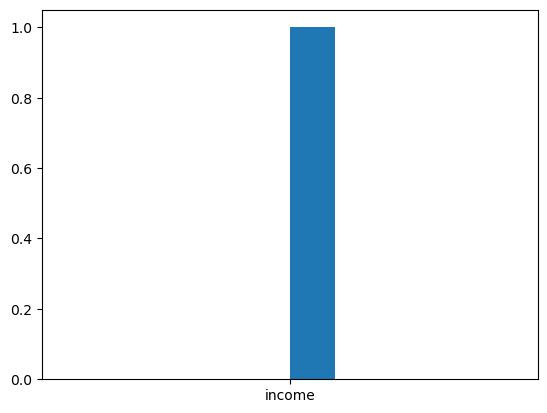

In [28]:
import seaborn as sns
plot = plt.hist(x = 'income',bins = 10,histtype = 'barstacked')

In [29]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(nex , y , test_size = 0.33  , random_state = 42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes=15)
clf.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

In [31]:
y_pred = clf.predict(xtest)

In [32]:
ytest.shape

(14924, 1)

In [33]:
y_pred.shape

(14924,)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     11232
           1       0.76      0.42      0.54      3692

    accuracy                           0.82     14924
   macro avg       0.80      0.69      0.71     14924
weighted avg       0.81      0.82      0.80     14924



In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,ytest))

0.8229697132136157


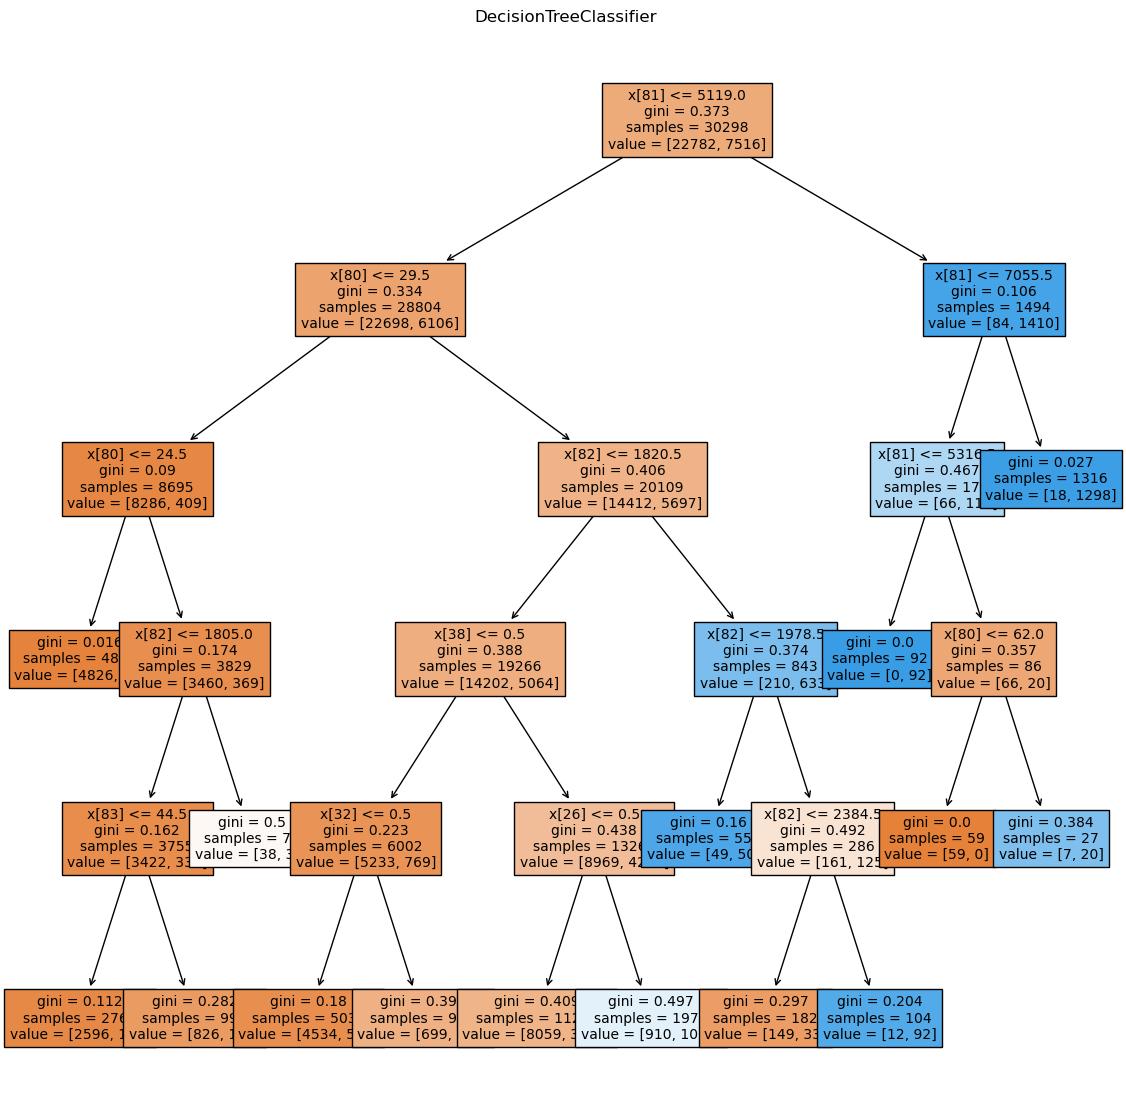

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
plot_tree(clf,fontsize=10,filled=True)
plt.title("DecisionTreeClassifier")
plt.show()

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


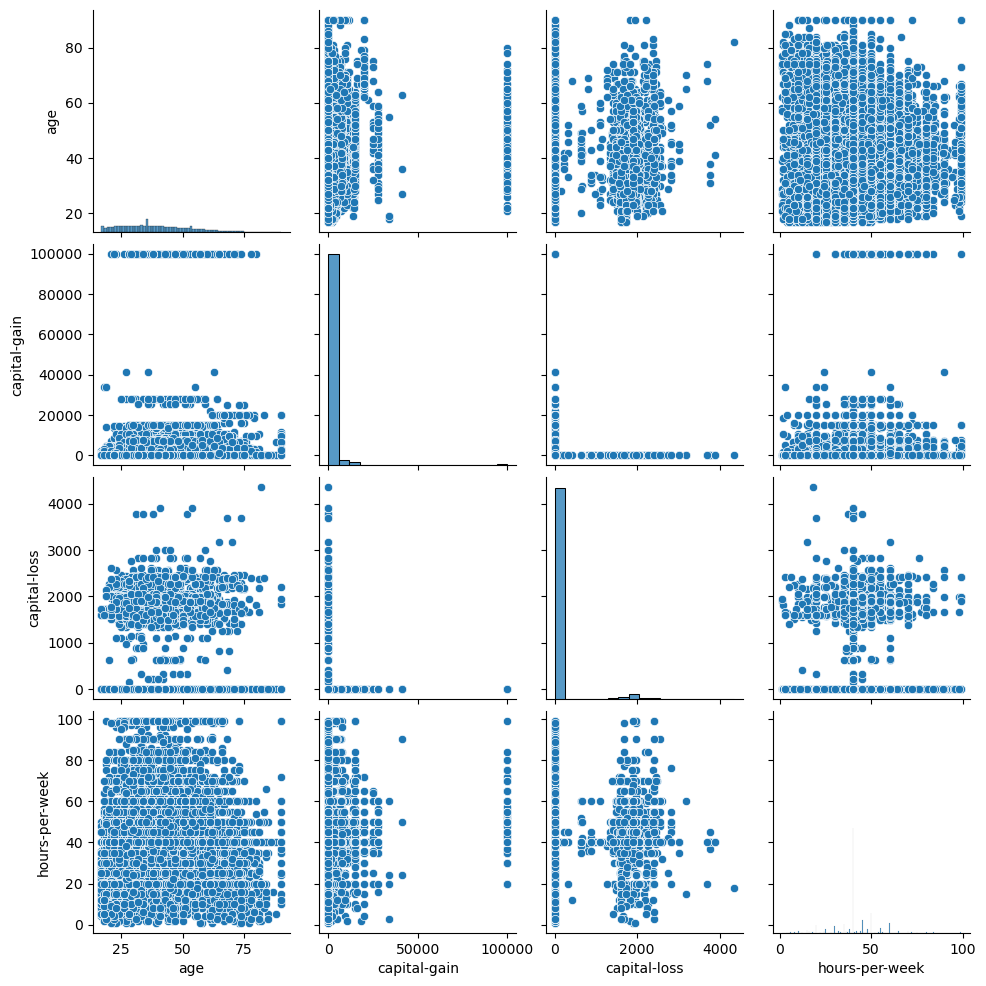

In [40]:
sns.pairplot(file)